In [16]:
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor,export_graphviz
import dtreeviz
from IPython.display import Image, display_svg, SVG
from fastbook import *

import pandas as pd

In [2]:
cred = '{"username":"adityarawat0701","key":"c18a3c6476c6fde8995c319adfdd5688"}'

In [3]:
comp = 'bluebook-for-bulldozers'
path = URLs.path(comp)
path

Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers')

In [4]:
from kaggle import api

if not path.exists():
    path.mkdir(parents = true)
    api.competition_download_cli(comp, path = path)
    shutil.unpack_archive(str(path/f'{comp}.zip'),str(path))

In [5]:
path.ls(file_exts = '.csv')

(#7) [Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/Machine_Appendix.csv'),Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/median_benchmark.csv'),Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/random_forest_benchmark_test.csv'),Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/Test.csv'),Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/TrainAndValid.csv'),Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/Valid.csv'),Path('C:/Users/adima/.fastai/archive/bluebook-for-bulldozers/ValidSolution.csv')]

In [16]:
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)

In [18]:
df.shape

(412698, 53)

In [65]:
df.ProductSize.unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large',
       'Compact'], dtype=object)

In [67]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'

In [68]:
df.ProductSize = df.ProductSize.astype('category')

In [69]:
df.ProductSize = df.ProductSize.cat.set_categories(sizes, ordered = True)

In [70]:
df[df.ProductSize == 'Small'].ProductSize

3         Small
44        Small
52        Small
55        Small
71        Small
          ...  
412658    Small
412667    Small
412668    Small
412669    Small
412670    Small
Name: ProductSize, Length: 27057, dtype: category
Categories (6, object): ['Large' < 'Large / Medium' < 'Medium' < 'Small' < 'Mini' < 'Compact']

In [6]:
dep_var = 'SalePrice'

In [25]:
df[dep_var] = np.log(df[dep_var])

In [26]:
df[dep_var] 

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
412693     9.210340
412694     9.259131
412695     9.433484
412696     9.210340
412697     9.472705
Name: SalePrice, Length: 412698, dtype: float64

In [75]:
df = add_datepart(df, 'saledate')

In [78]:
df_test = pd.read_csv(path/'Test.csv', low_memory = False)
df_test = add_datepart(df_test, 'saledate')

In [80]:
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [81]:
procs = [Categorify, FillMissing]

In [82]:
cond = (df.saleYear<2011) | (df.saleMonth<10)

In [84]:
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

In [85]:
splits = (list(train_idx),list(valid_idx))

In [86]:
cont,cat = cont_cat_split(df, 1, dep_var = dep_var)

In [87]:
to = TabularPandas(df, procs, cat, cont, y_names= dep_var, splits=splits)

In [88]:
len(to.train), len(to.valid)

(404710, 7988)

In [89]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [90]:
to1 = TabularPandas(df, procs, ['state', 'ProductGroup', 'Drive_System', 'Enclosure'], [], y_names = dep_var, splits=splits)

In [91]:
to1.show(3)

,state,ProductGroup,Drive_System,Enclosure,SalePrice
0,Alabama,WL,#na#,EROPS w AC,11.097410
1,North Carolina,WL,#na#,EROPS w AC,10.950807
2,New York,SSL,#na#,OROPS,9.210340


In [92]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,963,...,320,1,1,1,1,1,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,1745,...,86,1,1,1,1,1,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,336,...,57,1,1,1,1,1,1,1.077754e+09,1,1


In [7]:
to = pickle.load(open(path/"to.pkl", "rb"))

In [8]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [9]:
xs,y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [18]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y)

DecisionTreeRegressor(max_leaf_nodes=4)

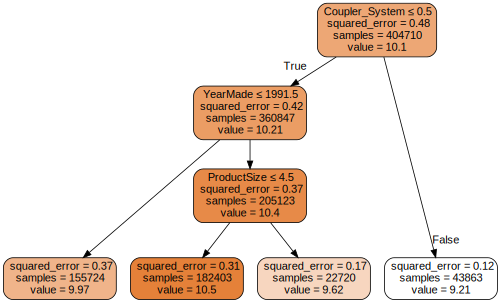

In [10]:
draw_tree(m, xs, size=7, leaves_parallel = True, precision =2)

[Text(0.6, 0.875, 'x[30] <= 0.5\nsquared_error = 0.482\nsamples = 404710\nvalue = 10.104'),
 Text(0.4, 0.625, 'x[57] <= 1991.5\nsquared_error = 0.417\nsamples = 360847\nvalue = 10.213'),
 Text(0.2, 0.375, 'squared_error = 0.375\nsamples = 155724\nvalue = 9.969'),
 Text(0.6, 0.375, 'x[6] <= 4.5\nsquared_error = 0.37\nsamples = 205123\nvalue = 10.398'),
 Text(0.4, 0.125, 'squared_error = 0.31\nsamples = 182403\nvalue = 10.495'),
 Text(0.8, 0.125, 'squared_error = 0.173\nsamples = 22720\nvalue = 9.622'),
 Text(0.8, 0.625, 'squared_error = 0.115\nsamples = 43863\nvalue = 9.208')]

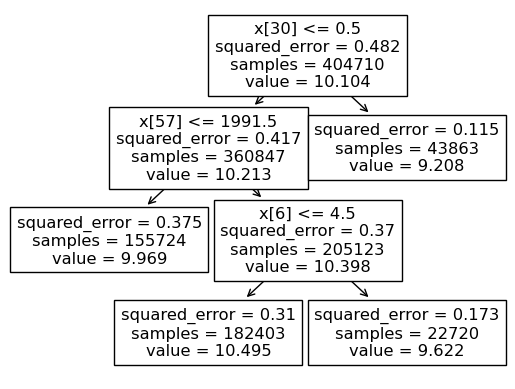

In [38]:
tree.plot_tree(m)

In [19]:
samp_idx = np.random.permutation(len(y))[:500]

In [20]:
viz = dtreeviz.model(m, xs.iloc[samp_idx], y.iloc[samp_idx],
                     feature_names = xs.columns, target_name = dep_var)

C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


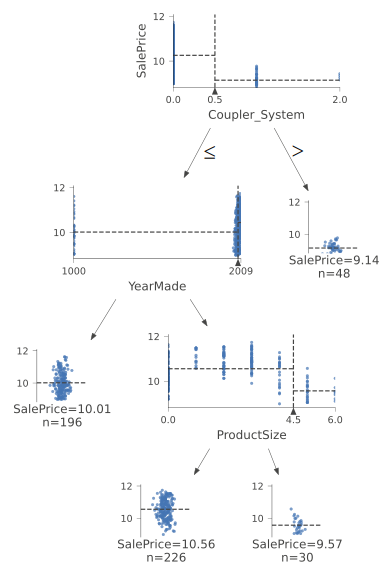

In [21]:
viz.view(fontname = 'DejaVu Sans', scale = 1.6, label_fontsize = 10,
        orientation = 'TD')

In [43]:
xs.loc[xs.YearMade<1900, 'YearMade'] = 1950

In [46]:
valid_xs.loc[valid_xs.YearMade <1900, 'YearMade'] = 1950

In [47]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs,y)

C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


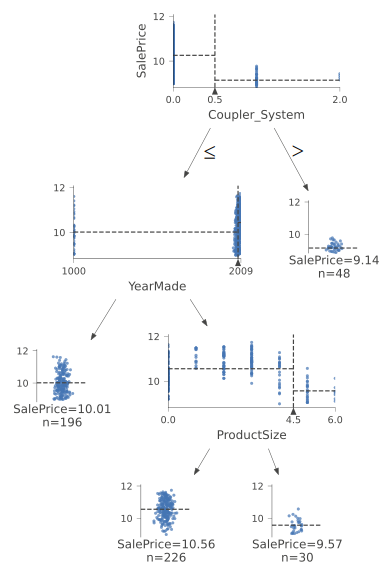

In [22]:
viz = dtreeviz.model(m , xs.iloc[samp_idx], y.iloc[samp_idx],
                     feature_names=xs.columns.values.tolist(), target_name=dep_var)
viz.view(fontname = 'DejaVu Sans', scale = 1.6, label_fontsize = 10,
        orientation = 'TD')

In [51]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [24]:
def r_mse(pred, y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs,y): return r_mse(m.predict(xs), y)

In [53]:
m_rmse(m, xs,y)

0.0

In [54]:
m_rmse(m, valid_xs, valid_y)

0.335584

In [55]:
m.get_n_leaves(), len(xs)

(324559, 404710)

In [25]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.211677, 0.26812)

In [26]:
m.get_n_leaves()

12397

In [29]:
def rf(xs, y, n_estimatros = 40, max_samples =200_000,
      max_features =0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs = -1, n_estimators = n_estimatros,
                                max_samples = max_samples, max_features=max_features,
                                min_samples_leaf=min_samples_leaf,oob_score = True).fit(xs,y)

In [30]:
m = rf(xs,y)

In [31]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.170825, 0.23242)

In [34]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\adima\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\U

In [41]:
r_mse(preds.mean(0), valid_y)

0.23242

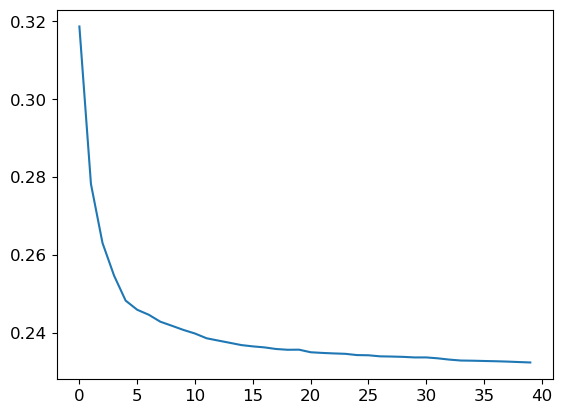

In [39]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)])

In [45]:
r_mse(m.oob_prediction_, y)

0.210601

In [46]:
preds.shape

(40, 7988)

In [47]:
preds_std = preds.std(0)

In [51]:
preds_std[:5]

array([0.32252873, 0.13989143, 0.09790035, 0.27597202, 0.0876494 ])

# Feature Importance


In [52]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp': m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [53]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
57,YearMade,0.178435
30,Coupler_System,0.126653
6,ProductSize,0.117443
7,fiProductClassDesc,0.066521
54,ModelID,0.058989
31,Grouser_Tracks,0.056609
65,saleElapsed,0.050438
3,fiSecondaryDesc,0.044998
1,fiModelDesc,0.031816
12,Enclosure,0.031805


<Axes: ylabel='cols'>

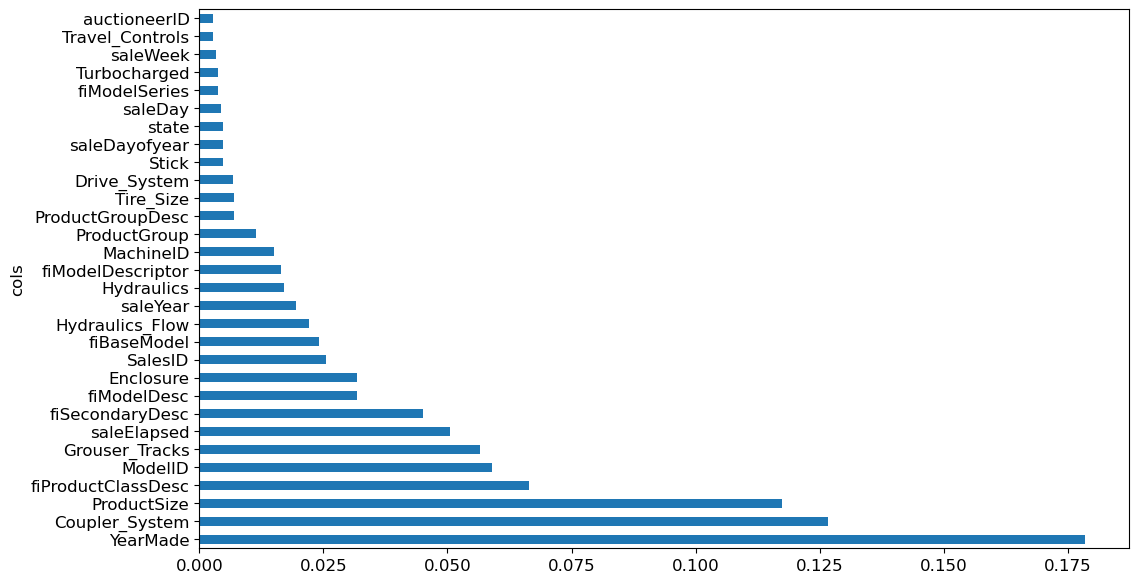

In [54]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize = (12,7), legend = False)

plot_fi(fi[:30])

<Axes: ylabel='cols'>

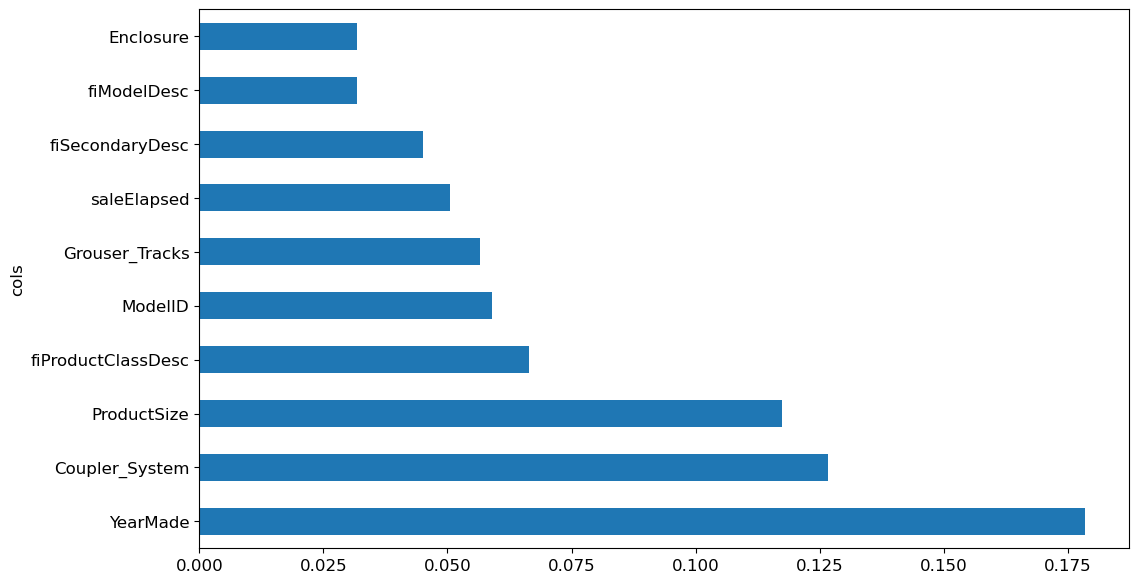

In [55]:
plot_fi(fi[:10])

Removing Low Importance Features

In [56]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

21

In [66]:
xs_imp = xs[to_keep]

In [77]:
valid_xs_imp = valid_xs[to_keep]

In [76]:
m = rf(xs_imp,y)

In [78]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.181469, 0.231536)

In [79]:
len(xs.columns), len(xs_imp.columns)

(66, 21)

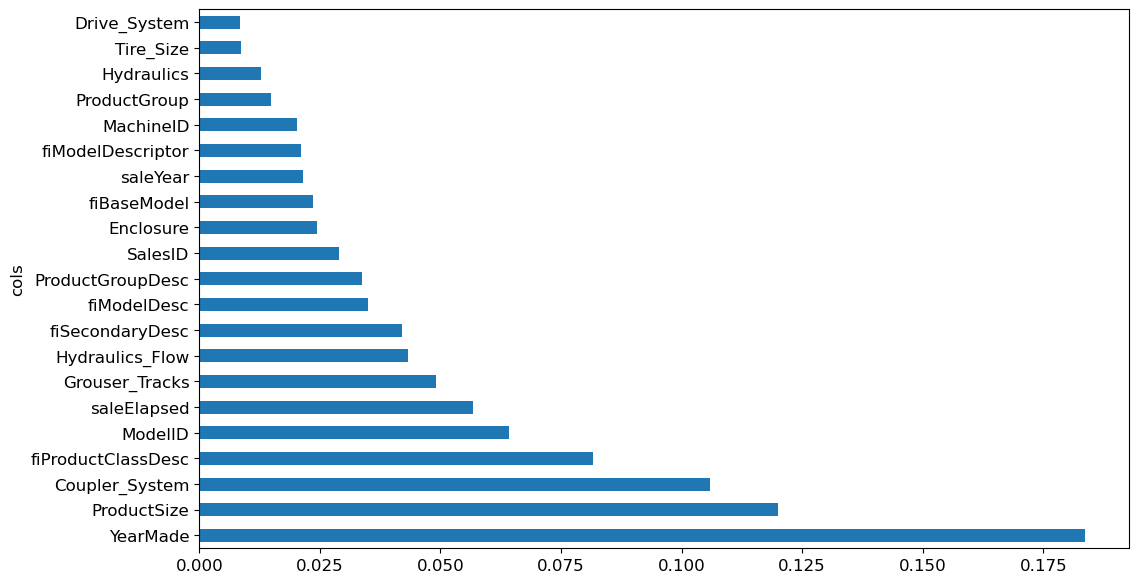

In [80]:
plot_fi(rf_feat_importance(m, xs_imp));

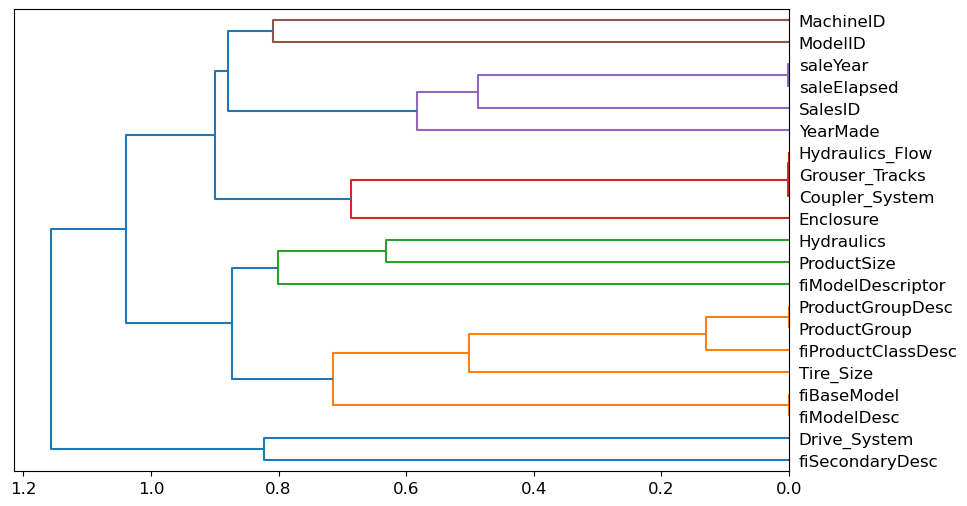

In [81]:
cluster_columns(xs_imp)

In [82]:
?cluster_columns